<a href="https://colab.research.google.com/github/restrepo/calculus/blob/master/Differential_Calculus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


It is rather straighforward to define a sright line. For example:
$$ y=3x $$
with two benchmark points $(x_1,y_1)=(1,3)$, $(x_2,y_2)=(3,9)$. 

From the general equation
$$y=mx+b\,,$$
In this case $m=3$ and $b=0$.

The _slope_ $m$ can be calculated as
$$m=\frac{y_2-y_1}{x_2-x_1}=\frac{9-3}{3-1}=\frac{6}{2}=3$$

In [37]:
x=np.linspace(0,10,11)
def y(x):
    return 3*x
y(x)

array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.])

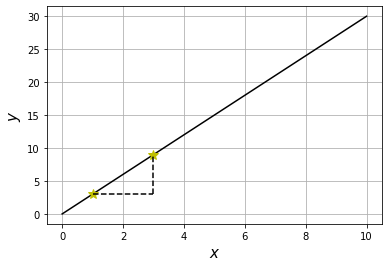

In [41]:
x=np.linspace(0,10,11)
def y(x):
    return 3*x
plt.plot(x,y(x),'k-')
plt.plot(1,y(1),'y*',markersize=10)
plt.plot(3,y(3),'y*',markersize=10)
plt.plot([1,y(1)],[3,y(1)],'k--')
plt.plot([3,y(1)],[3,y(3)],'k--')
plt.xlabel('$x$',size=15)
plt.ylabel('$y$',size=15)
plt.grid()

The main property of the straight line is that the same _slope_ can be obtained from any pair of points on it. To show we can defined the incresead linspace for

In [26]:
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

as the final points

In [30]:
x[1:]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

such that the initial points are just

In [34]:
x[:-1]

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

we can defind the set of nine _slopes_ as

In [43]:
m=(y(x[1:])-y(x[:-1]))/(x[1:]-x[:-1])
m

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

In [0]:
for i in  :
    plt.plot(xx)

In [0]:
for i in range(x[:-1].argmin(),x[:-1].argmax()):
    plt.plot( x[:-1][i]